In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path as op
from pprint import pprint as pp
import scipy.stats
import seaborn as sns


In [5]:
datapath = "~/teigen_data/output_rows.csv"

In [6]:
plotkw ={
    "figsize": [9, 6], 
    # "fontsize": 14
}

In [7]:
df = pd.read_csv(op.expanduser(datapath))
pp(df.keys())
df

# df

Index([u'appearance noise_preview', u'appearance show_aposteriori_surface',
       u'appearance skip_volume_generation', u'area volume [mm^3]',
       u'areasampling areasize_mm', u'areasampling areasize_px',
       u'areasampling voxelsize_mm', u'count []', u'datetime', u'filepattern',
       u'filepattern_series_number', u'generator_id',
       u'generators Continuous tubes element_number',
       u'generators Continuous tubes fixed_radius_distribution',
       u'generators Continuous tubes normal_radius_distribution',
       u'generators Continuous tubes radius_distribution_maximum',
       u'generators Continuous tubes radius_distribution_mean',
       u'generators Continuous tubes radius_distribution_minimum',
       u'generators Continuous tubes radius_distribution_standard_deviation',
       u'generators Continuous tubes random_generator_seed',
       u'generators Continuous tubes uniform_radius_distribution',
       u'generators Gensei n_objects',
       u'generators Unconnecte

,appearance noise_preview,appearance show_aposteriori_surface,appearance skip_volume_generation,area volume [mm^3],areasampling areasize_mm,areasampling areasize_px,areasampling voxelsize_mm,count [],datetime,filepattern,...,postprocessing noise_lambda_start,postprocessing noise_lambda_stop,postprocessing noise_mean,postprocessing noise_rng_seed,postprocessing output_dtype,required_teigen_version,surface [mm^2],surface d. [mm^-1],volume [mm^3],volume d. []
0,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",20.0,2017-05-11T00:04:45.482000,C:\Users\mjirik/teigen_data/{seriesn:03d}/data...,...,0.1,3.0,30.0,0,uint8,0.2.19,22479.085867,0.020436,55124.081851,0.050113
1,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",20.0,2017-05-11T00:05:23.807000,C:\Users\mjirik/teigen_data/{seriesn:03d}/data...,...,0.1,3.0,30.0,0,uint8,0.2.19,27447.600177,0.024952,83265.345456,0.075696
2,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",20.0,2017-05-11T00:06:05.722000,C:\Users\mjirik/teigen_data/{seriesn:03d}/data...,...,0.1,3.0,30.0,0,uint8,0.2.19,22849.646037,0.020772,59359.631831,0.053963
3,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",20.0,2017-05-11T00:06:42.132000,C:\Users\mjirik/teigen_data/{seriesn:03d}/data...,...,0.1,3.0,30.0,0,uint8,0.2.19,24560.292761,0.022328,72869.669899,0.066245
4,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",20.0,2017-05-11T00:07:28.868000,C:\Users\mjirik/teigen_data/{seriesn:03d}/data...,...,0.1,3.0,30.0,0,uint8,0.2.19,18671.066813,0.016974,38050.236181,0.034591
5,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",20.0,2017-05-11T00:31:50.173000,C:\Users\mjirik/teigen_data/{seriesn:03d}/data...,...,0.1,3.0,30.0,0,uint8,0.2.19,15181.008181,0.013801,40297.108368,0.036634
6,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",20.0,2017-05-11T00:33:09.543000,C:\Users\mjirik/teigen_data/{seriesn:03d}/data...,...,0.1,3.0,30.0,0,uint8,0.2.19,15181.008181,0.013801,40297.108368,0.036634
7,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",20.0,2017-05-11T00:36:07.379000,C:\Users\mjirik/teigen_data/{seriesn:03d}/data...,...,0.1,3.0,30.0,0,uint8,0.2.19,15181.008181,0.013801,40297.108368,0.036634
8,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",20.0,2017-05-11T00:46:14.848000,C:\Users\mjirik/teigen_data/{seriesn:03d}/data...,...,0.1,3.0,30.0,0,uint8,0.2.19,15181.008181,0.013801,40297.108368,0.036634
9,False,True,True,1100000.0,"[110.0, 100.0, 100.0]","[110, 100, 100]","[1.0, 1.0, 1.0]",20.0,2017-05-11T00:46:34,C:\Users\mjirik/teigen_data/{seriesn:03d}/data...,...,0.1,3.0,30.0,0,uint8,0.2.19,15181.008181,0.013801,40297.108368,0.036634


# Numeric measurement precision (element_numer = 20, length_mean = 15)

,surface error [%],volume error [%],measurement_resolution
13,7.935533,0.533004,6
11,3.699929,0.237175,8
12,2.683030,0.329925,10
9,1.491061,0.376402,13
10,0.922143,0.247830,16
8,0.566972,0.093745,20
6,0.281111,0.118100,30
5,0.198221,0.110145,35
7,0.152045,0.069274,40


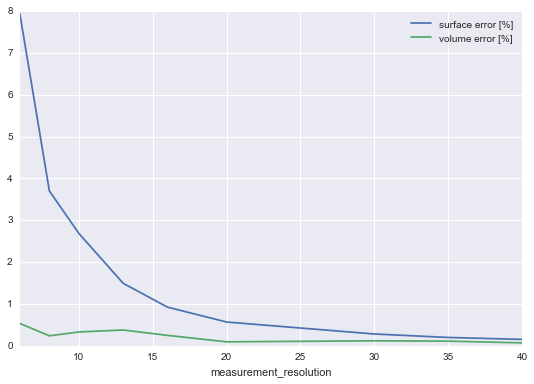

In [8]:
df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
dfs = df[
    df["generators Unconnected tubes length_distribution_mean"] == 15
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
dfsp.plot(
    x="measurement_resolution", **plotkw)
dfsp

In [9]:
pd.__version__

u'0.20.1'

In [10]:
## element_number = 10, 

,surface error [%],volume error [%],measurement_resolution
14,7.913672,0.532317,6
16,7.653418,0.591397,6
18,2.381441,0.287439,10
17,1.007852,0.137899,15
20,0.551407,0.078044,20
19,0.352376,0.054445,25
21,0.178471,0.031169,35
15,0.077851,0.000286,50


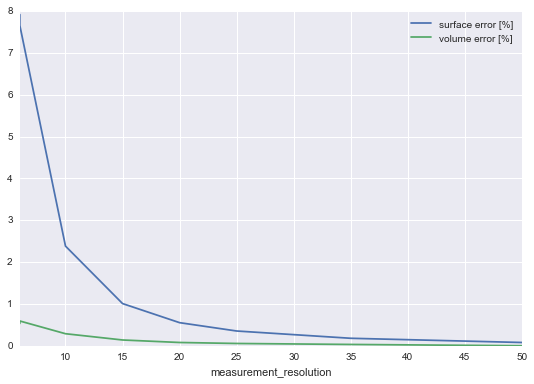

In [11]:
df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
dfs = df[
    df["generators Unconnected tubes length_distribution_mean"] == 17
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort_values(
    "measurement_resolution")
dfsp.plot(
    x="measurement_resolution", **plotkw)
dfsp

# Numeric and analytic error

![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20](id26en40lm40rm5mr20.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20
![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10](id26en40lm40rm5mr10.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10

## measurement_resolution = 25

In [24]:
df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = df["numeric surface [mm^2]"] - df["surface [mm^2]"]
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = df["numeric volume [mm^3]"] - df["volume [mm^3]"]
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
df["element_number"] = df["generators Unconnected tubes element_number"]
df["length_distribution_mean"] = df["generators Unconnected tubes radius_distribution_mean"]
df["radius_distribution_mean"] = df["generators Unconnected tubes length_distribution_mean"]
dfs = df[
    df["measurement_resolution"] == 25
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["volume [mm^3]", "numeric volume [mm^3]", "surface [mm^2]", "numeric surface [mm^2]", "surface error [%]", "volume error [%]", "element_number", "length_distribution_mean", "radius_distribution_mean"]]
dfsp

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%],element_number,length_distribution_mean,radius_distribution_mean
19,52613.907144,52642.553039,19205.360485,19273.035631,0.352376,0.054445,20,5.0,17.0
29,70978.062029,71015.241327,16986.554199,17044.355338,0.340276,0.052381,10,20.0,30.0
30,54426.650520,54463.595876,14203.951398,14253.801164,0.350957,0.067881,10,20.0,30.0
31,73391.559372,73439.827675,17622.362819,17682.695736,0.342366,0.065768,10,20.0,30.0
32,102313.644035,102380.277177,19856.361918,19926.537700,0.353417,0.065126,10,20.0,30.0
33,127261.081328,127349.357579,22570.008392,22650.996709,0.358832,0.069366,10,20.0,30.0
34,142913.046591,143012.726325,24278.258679,24363.457357,0.350926,0.069749,10,20.0,30.0
35,60554.548692,60581.666900,17010.080706,17066.103625,0.329351,0.044783,10,20.0,30.0
36,108690.414311,108679.740978,22756.694178,22839.237220,0.362720,-0.009820,10,20.0,30.0
37,52023.472254,52117.317074,13721.519147,13777.937322,0.411166,0.180389,10,20.0,30.0


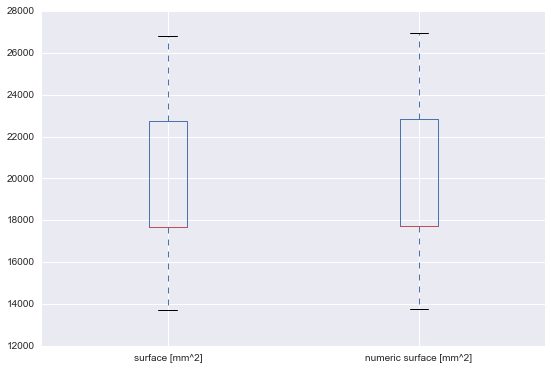

In [25]:

axp = dfsp[["surface [mm^2]", "numeric surface [mm^2]"]].plot(kind="box", **plotkw)

In [ ]:
sns.

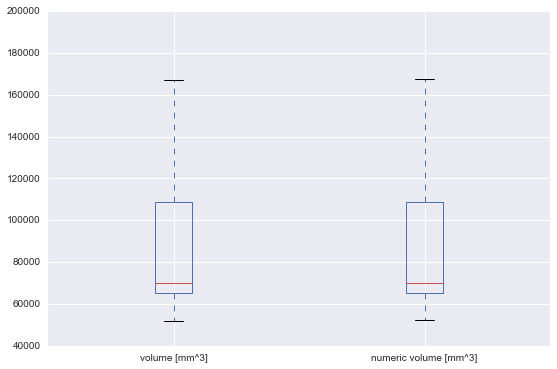

In [26]:
axp = dfsp[["volume [mm^3]", "numeric volume [mm^3]"]].plot(kind="box", **plotkw)

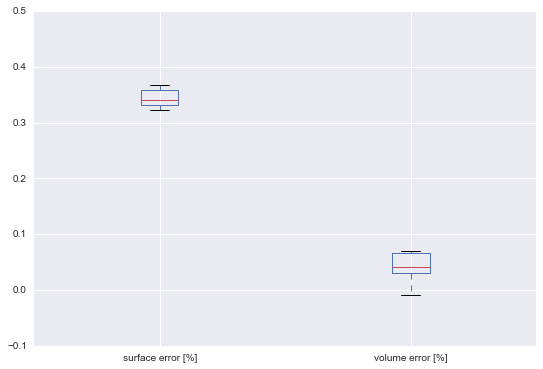

In [27]:
axp = dfsp[["surface error [%]", "volume error [%]"]].plot(kind="box", **plotkw)

In [28]:
dfsp.describe()

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%],element_number,length_distribution_mean,radius_distribution_mean
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0,25.000000,25.000000
mean,89685.115779,89736.288142,19517.913429,19587.018825,0.352485,0.057207,10.4,15.000000,47.080000
std,38455.354002,38479.876645,3633.599531,3649.011565,0.031701,0.048611,2.0,5.400617,20.892423
min,52023.472254,52117.317074,13721.519147,13777.937322,0.323149,-0.009820,10.0,5.000000,17.000000
25%,65130.511812,65150.490301,17687.137539,17745.824077,0.331803,0.030675,10.0,10.000000,30.000000
50%,69801.117959,69944.380692,17687.137539,17745.824077,0.340276,0.041604,10.0,20.000000,30.000000
75%,108690.414311,108679.740978,22756.694178,22839.237220,0.358832,0.066736,10.0,20.000000,70.000000
max,199350.039119,199413.563444,26816.184084,26928.342091,0.438036,0.205244,20.0,20.000000,70.000000


# Statistics

## Surface

In [29]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfsp["surface [mm^2]"], y=dfsp["numeric surface [mm^2]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=1.1382727182248037e-05)

In [30]:
scipy.stats.wilcoxon(dfsp["surface error [%]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=1.1382727182248037e-05)

In [31]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfsp["surface [mm^2]"], dfsp["numeric surface [mm^2]"])

SpearmanrResult(correlation=1.0, pvalue=0.0)

## Volume

In [32]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfsp["volume [mm^3]"], y=dfsp["numeric volume [mm^3]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=1.0, pvalue=1.2883308337354633e-05)

In [33]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfsp["volume [mm^3]"], dfsp["numeric volume [mm^3]"])

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [34]:
resolution = 6
radius = 10

alpha = (2*np.pi) / (resolution)
radius_out = radius / np.cos(alpha/2)

radius_out


11.547005383792515

In [23]:
np.cos(np.pi/2)

6.123233995736766e-17